In [2]:
from tqdm import tqdm
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verified users

In [3]:
df = pd.read_csv("verified.dat")
df.head()

,#ID,ScreenName,Protected,Verified,FriendsCount,FollowersCount,ListedCount,StatusesCount,CreatedAt,URL,ProfileImageURL,Location,Relation,Subject
0,490843992,ruaridh_langan,False,True,668,759,4,953,Sun Feb 12 23:51:19 +0000 2012,NaN,http://pbs.twimg.com/profile_images/1439567595...,"Scotland, United Kingdom",friends,verified
1,2216668776,janelle_cpp,False,True,3486,2536,29,17464,Tue Nov 26 22:43:08 +0000 2013,https://t.co/282UrLP38b,http://pbs.twimg.com/profile_images/1427197677...,stolen patwin/yokut land,friends,verified
2,363373418,archiliciouz,False,True,753,5558,22,8732,Sun Aug 28 00:12:47 +0000 2011,https://t.co/qOXXAaoxIN,http://pbs.twimg.com/profile_images/1426328390...,"Ukraine, Kyiv",friends,verified
3,3356306397,JakobLazzaro,False,True,261,269,13,2458,Fri Jul 03 06:40:34 +0000 2015,https://t.co/pbC2S0oXDU,http://pbs.twimg.com/profile_images/1181214533...,"South Bend, IN",friends,verified
4,208046707,ArifAltunkaynak,False,True,455,2671,10,4325,Tue Oct 26 14:41:19 +0000 2010,https://t.co/4OOrdBj3gv,http://pbs.twimg.com/profile_images/3788000004...,"Nusaybin, Türkiye",friends,verified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384494 entries, 0 to 384493
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   #ID              384494 non-null  int64 
 1   ScreenName       384493 non-null  object
 2   Protected        384494 non-null  bool  
 3   Verified         384494 non-null  bool  
 4   FriendsCount     384494 non-null  int64 
 5   FollowersCount   384494 non-null  int64 
 6   ListedCount      384494 non-null  int64 
 7   StatusesCount    384494 non-null  int64 
 8   CreatedAt        384494 non-null  object
 9   URL              384465 non-null  object
 10  ProfileImageURL  384485 non-null  object
 11  Location         311171 non-null  object
 12  Relation         384494 non-null  object
 13  Subject          384494 non-null  object
dtypes: bool(2), int64(5), object(7)
memory usage: 35.9+ MB


In [5]:
df.head()

,#ID,ScreenName,Protected,Verified,FriendsCount,FollowersCount,ListedCount,StatusesCount,CreatedAt,URL,ProfileImageURL,Location,Relation,Subject
0,490843992,ruaridh_langan,False,True,668,759,4,953,Sun Feb 12 23:51:19 +0000 2012,NaN,http://pbs.twimg.com/profile_images/1439567595...,"Scotland, United Kingdom",friends,verified
1,2216668776,janelle_cpp,False,True,3486,2536,29,17464,Tue Nov 26 22:43:08 +0000 2013,https://t.co/282UrLP38b,http://pbs.twimg.com/profile_images/1427197677...,stolen patwin/yokut land,friends,verified
2,363373418,archiliciouz,False,True,753,5558,22,8732,Sun Aug 28 00:12:47 +0000 2011,https://t.co/qOXXAaoxIN,http://pbs.twimg.com/profile_images/1426328390...,"Ukraine, Kyiv",friends,verified
3,3356306397,JakobLazzaro,False,True,261,269,13,2458,Fri Jul 03 06:40:34 +0000 2015,https://t.co/pbC2S0oXDU,http://pbs.twimg.com/profile_images/1181214533...,"South Bend, IN",friends,verified
4,208046707,ArifAltunkaynak,False,True,455,2671,10,4325,Tue Oct 26 14:41:19 +0000 2010,https://t.co/4OOrdBj3gv,http://pbs.twimg.com/profile_images/3788000004...,"Nusaybin, Türkiye",friends,verified


In [6]:
pd.options.display.float_format = '{:.2f}'.format

In [7]:
df[['FriendsCount', 'FollowersCount', 'ListedCount', 'StatusesCount']].describe()

,FriendsCount,FollowersCount,ListedCount,StatusesCount
count,384494.00,384494.00,384494.00,384494.00
mean,1909.96,119267.42,453.03,19377.07
std,18742.22,968672.83,5628.24,190965.34
min,0.00,1.00,0.00,0.00
25%,203.00,3139.00,37.00,1835.00
50%,579.00,10470.00,107.00,5960.00
75%,1330.00,40268.75,305.00,16394.00
max,4190657.00,130027990.00,3106624.00,69691687.00


In [8]:
fol_max = 1000000

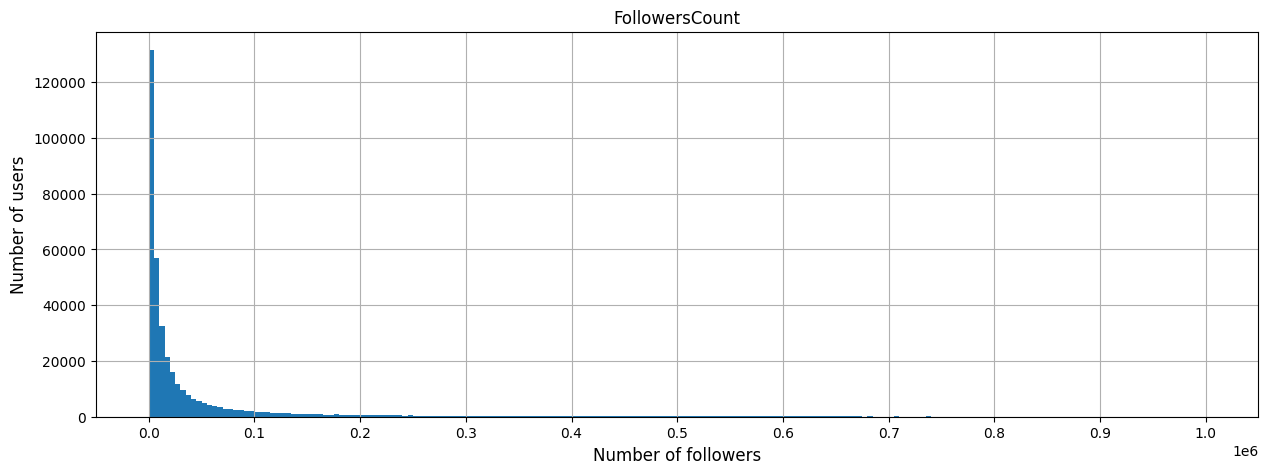

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
df[df['FollowersCount'] < fol_max].hist(column='FollowersCount', bins=200, ax=ax)
plt.xticks(np.arange(0, fol_max+1, fol_max/10))

plt.ylabel("Number of users", fontsize=12)
plt.xlabel("Number of followers",fontsize=12)

plt.show()

In [10]:
fr_max = 10000

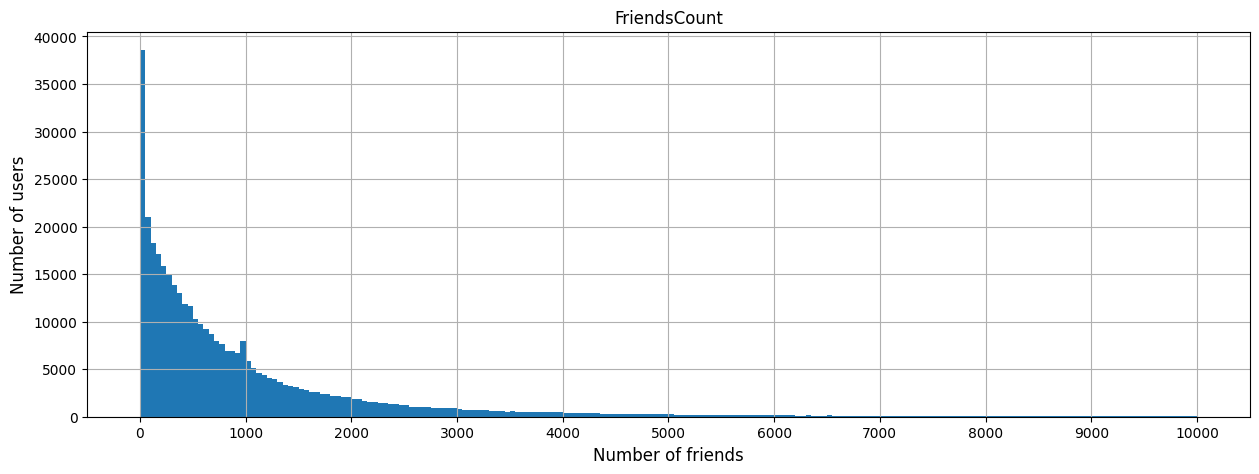

In [11]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['FriendsCount'] < fr_max].hist(column='FriendsCount', bins=200, ax=ax)
plt.xticks(np.arange(0, fr_max+1, fr_max/10))

plt.ylabel("Number of users", fontsize=12)
plt.xlabel("Number of friends",fontsize=12)

plt.show()

In [12]:
status_max = 100000

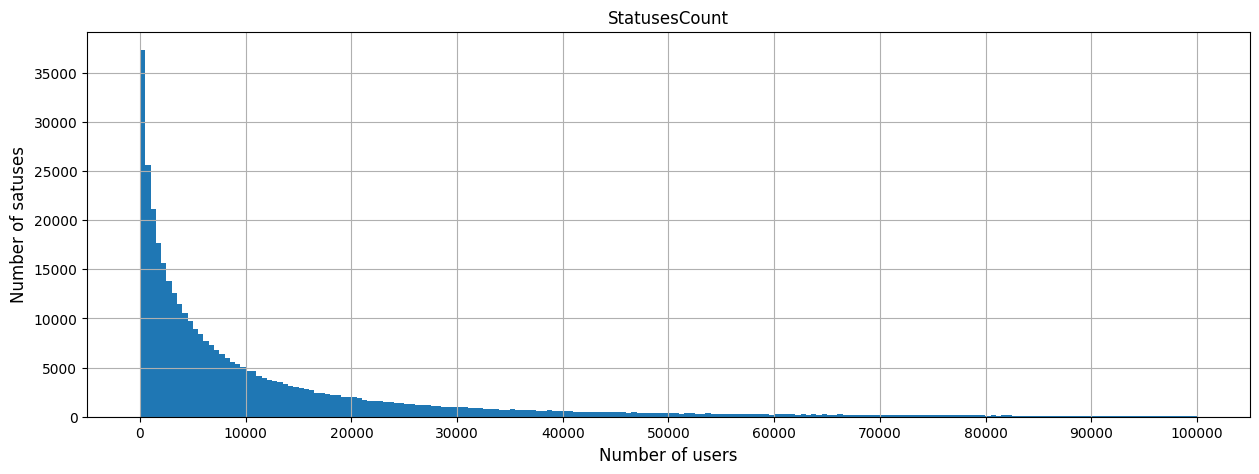

In [13]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['StatusesCount'] < status_max].hist(column='StatusesCount', bins=200, ax=ax)
plt.xticks(np.arange(0, status_max+1, status_max/10))

plt.xlabel("Number of users", fontsize=12)
plt.ylabel("Number of satuses",fontsize=12)

plt.show()

In [14]:
list_max = 5000

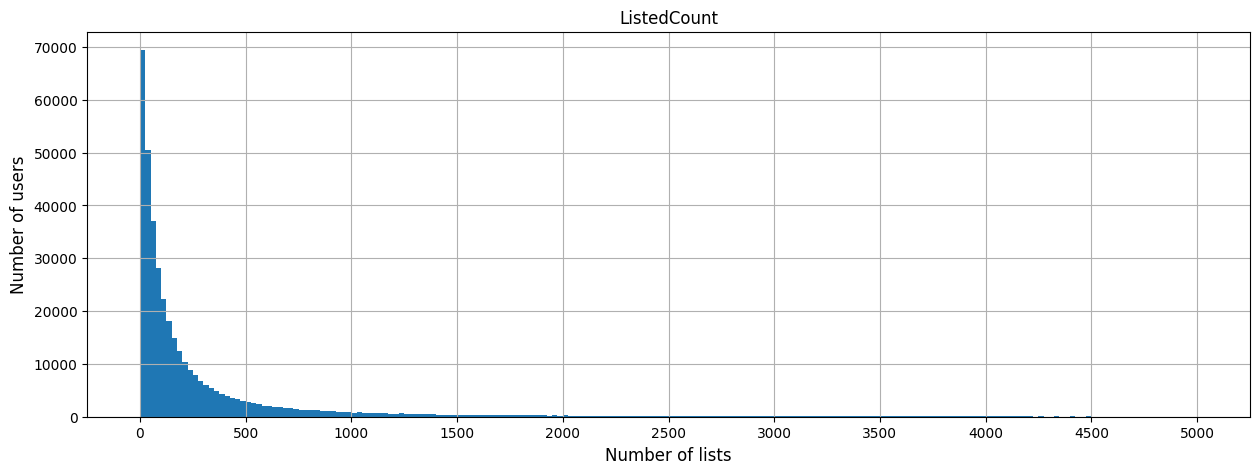

In [15]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['ListedCount'] < list_max].hist(column='ListedCount', bins=200, ax=ax)
plt.xticks(np.arange(0, list_max+1, list_max/10))

plt.ylabel("Number of users", fontsize=12)
plt.xlabel("Number of lists",fontsize=12)

plt.show()

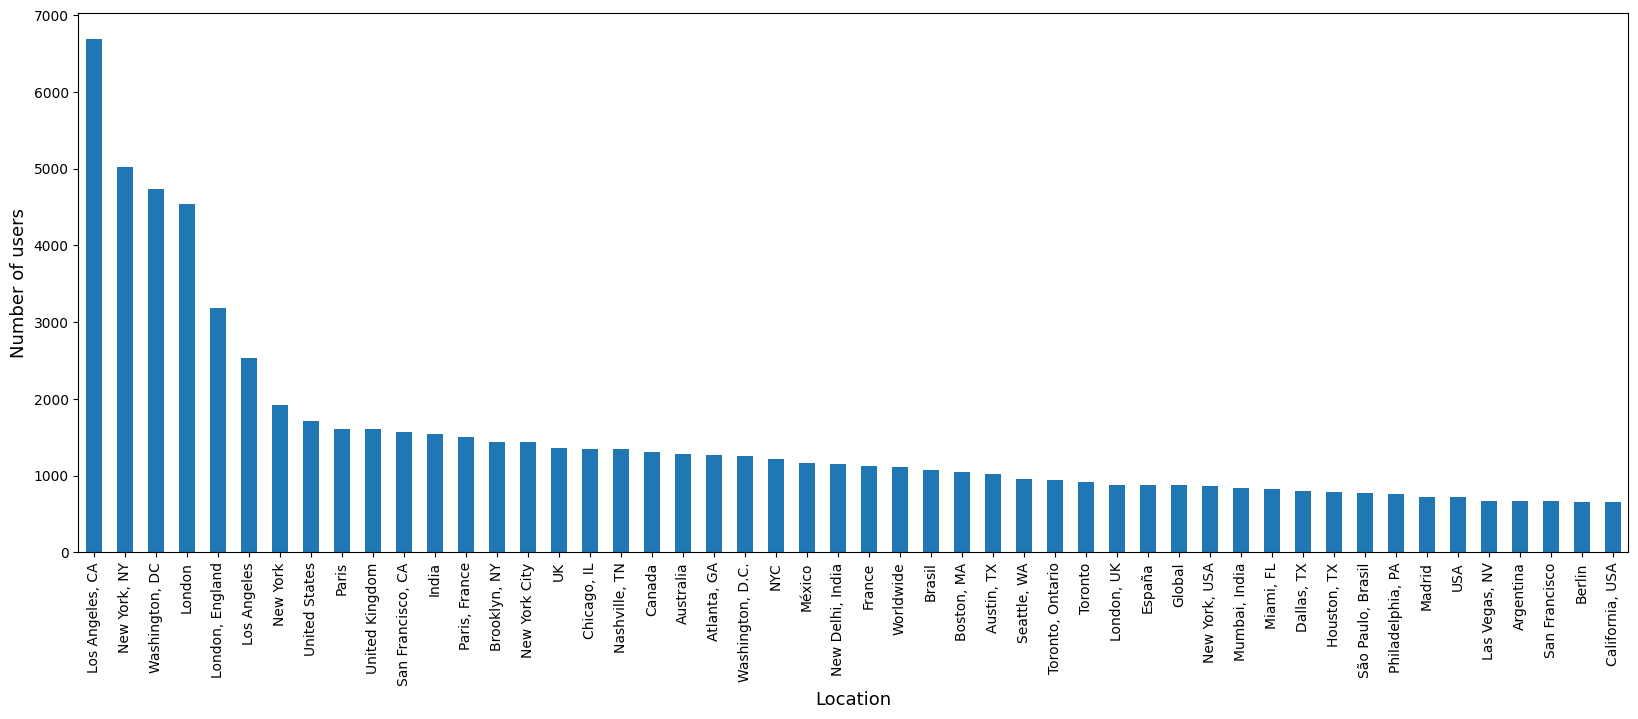

In [16]:
df["Location"].value_counts()[:50].plot.bar(figsize=(20,7))

plt.xlabel("Location", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

In [17]:
dates = list(df['CreatedAt'].values)

created = []

for date in dates:
    created.append(date.split()[-1])

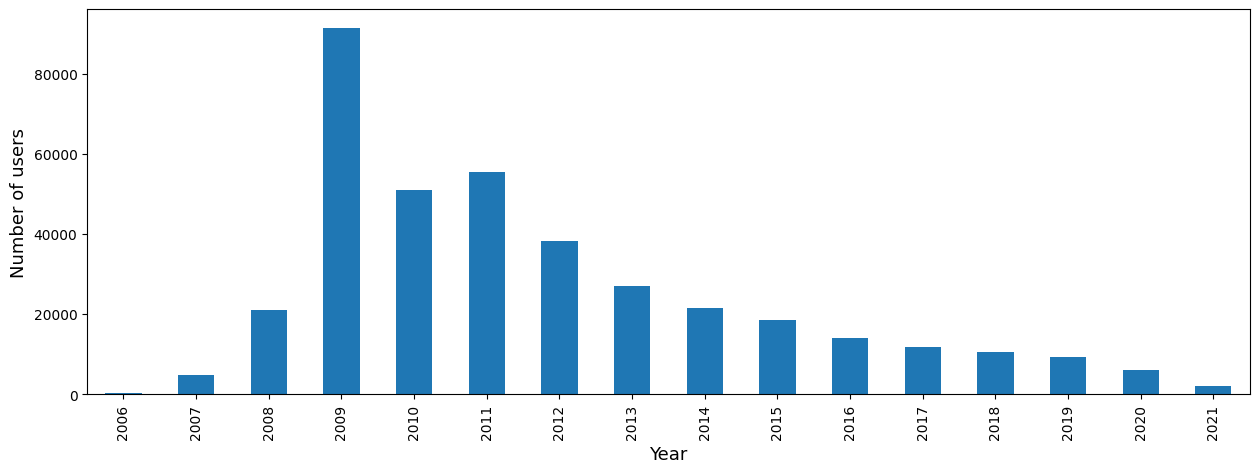

In [18]:
df['year'] = created

df['year'].groupby(df["year"]).count().plot(kind = 'bar', figsize=(15,5))

plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

A big chunk verified accounts were created in 2009, which was when Twitter was most popular. Since then there has been a steady decline, and in the last two years, this may be party due to the fact that Twitter has paused public submissions for verification since early 2018.

In [19]:
months = []

for date in dates:
    months.append(date.split()[1])

df['month'] = months

In [20]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

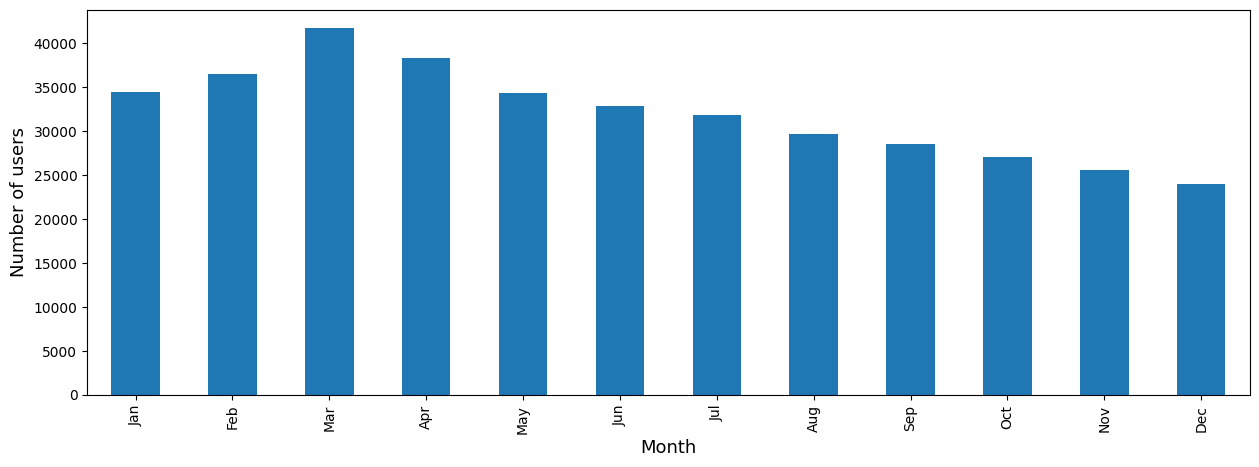

In [21]:
df['month'].groupby(df["month"]).count().loc[order].plot(kind = 'bar', figsize=(15,5))

plt.xlabel("Month", fontsize=13)
plt.ylabel("Number of users",fontsize=13)

plt.show()

In [22]:
import networkx as nx

# Get the IDs of the top 5 users with the highest FriendsCount
top_users_ids = df.nlargest(5, 'FriendsCount')['#ID'].tolist()

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph for the top users
for user_id in top_users_ids:
    friends_count = df.loc[df['#ID'] == user_id, 'FriendsCount'].values[0]
    G.add_node(user_id, friends_count=friends_count)

# Limit the sampling size for efficiency
max_friends = 1000  # Maximum number of friends to sample for each user

# Add edges to the graph (follow relationships) for the top users with limited sampling
for user_id in top_users_ids:
    row = df.loc[df['#ID'] == user_id]
    friends = min(row['FriendsCount'].values[0], max_friends)
    friends_list = np.random.choice(df['#ID'], size=friends, replace=False)
    for friend_id in friends_list:
        if friend_id != user_id:  # Avoid self-loops
            G.add_edge(user_id, friend_id)

# Basic graph properties
print("Number of nodes (users):", G.number_of_nodes())
print("Number of edges (follow relationships):", G.number_of_edges())

# Calculate and print network metrics
print("Average degree:", sum(dict(G.degree()).values()) / len(G))
print("Average clustering coefficient:", nx.average_clustering(G))

# Calculate the diameter for weakly connected components
components = nx.weakly_connected_components(G)
for component in components:
    component_graph = G.subgraph(component)
    print("Diameter for component:", nx.diameter(component_graph))

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=False, node_size=20, node_color='skyblue', edge_color='gray')
plt.title("Social Network Graph for Top Users")
plt.show()

Number of nodes (users): 4989
Number of edges (follow relationships): 5000
Average degree: 2.0044097013429547
Average clustering coefficient: 0.0


NetworkXError: Found infinite path length because the digraph is not strongly connected

The dataset doesn't contain such data where the path length can't be found, you can mention that in real-world social networks, it's common for not all users to be directly connected to each other. In this dataset of Twitter, users may follow others who don't follow them back, creating a directed graph where not all nodes are reachable from each other. This results in disconnected components in the graph, leading to the NetworkX error you encountered.

In [ ]:
# Find the account with the highest number of friends
max_friends_account = df.loc[df['FriendsCount'].idxmax(), 'ScreenName']
max_friends_count = df['FriendsCount'].max()

# Find the account with the highest number of followers
max_followers_account = df.loc[df['FollowersCount'].idxmax(), 'ScreenName']
max_followers_count = df['FollowersCount'].max()

# Find the account with the highest number of both friends and followers
max_both_account = df.loc[(df['FriendsCount'] + df['FollowersCount']).idxmax(), 'ScreenName']
max_both_count = df['FriendsCount'].max() + df['FollowersCount'].max()

print("Account with the highest number of friends:", max_friends_account)
print("Number of friends:", max_friends_count)

print("Account with the highest number of followers:", max_followers_account)
print("Number of followers:", max_followers_count)

print("Account with the highest number of both friends and followers:", max_both_account)
print("Combined number of friends and followers:", max_both_count)

Account with the highest number of friends: 6BillionPeople
Number of friends: 4190657
Account with the highest number of followers: BarackObama
Number of followers: 130027990
Account with the highest number of both friends and followers: BarackObama
Combined number of friends and followers: 134218647


In [23]:
# Find the top 5 accounts with the highest number of friends
top_friends_accounts = df.nlargest(5, 'FriendsCount')[['ScreenName', 'FriendsCount']]

# Find the top 5 accounts with the highest number of followers
top_followers_accounts = df.nlargest(5, 'FollowersCount')[['ScreenName', 'FollowersCount']]

# Find the top 5 accounts with the highest number of both friends and followers
df['TotalFollowersFriends'] = df['FriendsCount'] + df['FollowersCount']
top_both_accounts = df.nlargest(5, 'TotalFollowersFriends')[['ScreenName', 'TotalFollowersFriends']]

print("Top 5 accounts with the highest number of friends:")
print(top_friends_accounts)

print("\nTop 5 accounts with the highest number of followers:")
print(top_followers_accounts)

print("\nTop 5 accounts with the highest number of both friends and followers:")
print(top_both_accounts)

Top 5 accounts with the highest number of friends:
            ScreenName  FriendsCount
352916  6BillionPeople       4190657
312692  liferdefempire       2282592
146675  Karabo_Mokgoko       2077458
343468     Starbucks_J       1690545
316802       benlandis       1582312

Top 5 accounts with the highest number of followers:
          ScreenName  FollowersCount
384461   BarackObama       130027990
383943  justinbieber       114016239
322112     katyperry       108788824
381186       rihanna       103008128
382917     Cristiano        94420848

Top 5 accounts with the highest number of both friends and followers:
          ScreenName  TotalFollowersFriends
384461   BarackObama              130617140
383943  justinbieber              114303382
322112     katyperry              108789061
381186       rihanna              103009130
382917     Cristiano               94420905


We can see that the celebrities have the highest number of followers

# Unverified

In [44]:
df = pd.read_csv("twitter_data.csv")
df.head()

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,description,tweets,total_fake,total_real,net_trust,total_news,fake_prob,net_trust_norm,fake
0,14669951,DRUDGE REPORT,2,1378378,21171,237720,1.00,3.00,2.00,2.00,the drudge report u.s. based news aggregation ...,ice detainer issued suspected wine country ars...,3.00,5.00,2.00,8.00,0.38,0.25,0.00
1,1754641,NYT Business,441,786607,14628,207256,0.00,3.00,4.00,4.00,financial tech media business news the new yor...,the morning president rally missouri house com...,4.00,7.00,3.00,11.00,0.36,0.27,0.00
2,24733117,Jeffrey Levin,0,610302,5754,611789,5.00,36.00,20.00,15.00,marketing programs manager social media human ...,none normal read full transcript sen. jeff fla...,25.00,51.00,26.00,76.00,0.33,0.34,0.00
3,3863605355,History Lovers Club,0,547308,5048,254351,0.00,6.00,96.00,0.00,rare historical photos all copyrights belong r...,president barack obama pope francis meet first...,96.00,6.00,-90.00,102.00,0.94,-0.88,1.00
4,53036660,GLAMOUR South Africa,864,500713,357,36650,0.00,0.00,7.00,5.00,diverse authentic bold,lady gaga shows huge engagement ring grammys g...,7.00,5.00,-2.00,12.00,0.58,-0.17,1.00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              3368 non-null   int64  
 1   name             3368 non-null   object 
 2   friends_count    3368 non-null   int64  
 3   followers_count  3368 non-null   int64  
 4   listed_count     3368 non-null   int64  
 5   statuses_count   3368 non-null   int64  
 6   pff              3368 non-null   float64
 7   pfr              3368 non-null   float64
 8   gcf              3368 non-null   float64
 9   gcr              3368 non-null   float64
 10  description      3330 non-null   object 
 11  tweets           3368 non-null   object 
 12  total_fake       3368 non-null   float64
 13  total_real       3368 non-null   float64
 14  net_trust        3368 non-null   float64
 15  total_news       3368 non-null   float64
 16  fake_prob        3368 non-null   float64
 17  net_trust_norm

In [26]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              3368 non-null   int64  
 1   name             3368 non-null   object 
 2   friends_count    3368 non-null   int64  
 3   followers_count  3368 non-null   int64  
 4   listed_count     3368 non-null   int64  
 5   statuses_count   3368 non-null   int64  
 6   pff              3368 non-null   float64
 7   pfr              3368 non-null   float64
 8   gcf              3368 non-null   float64
 9   gcr              3368 non-null   float64
 10  description      3330 non-null   object 
 11  tweets           3368 non-null   object 
 12  total_fake       3368 non-null   float64
 13  total_real       3368 non-null   float64
 14  net_trust        3368 non-null   float64
 15  total_news       3368 non-null   float64
 16  fake_prob        3368 non-null   float64
 17  net_trust_norm

In [28]:
df.head()

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,description,tweets,total_fake,total_real,net_trust,total_news,fake_prob,net_trust_norm,fake
0,14669951,DRUDGE REPORT,2,1378378,21171,237720,1.00,3.00,2.00,2.00,the drudge report u.s. based news aggregation ...,ice detainer issued suspected wine country ars...,3.00,5.00,2.00,8.00,0.38,0.25,0.00
1,1754641,NYT Business,441,786607,14628,207256,0.00,3.00,4.00,4.00,financial tech media business news the new yor...,the morning president rally missouri house com...,4.00,7.00,3.00,11.00,0.36,0.27,0.00
2,24733117,Jeffrey Levin,0,610302,5754,611789,5.00,36.00,20.00,15.00,marketing programs manager social media human ...,none normal read full transcript sen. jeff fla...,25.00,51.00,26.00,76.00,0.33,0.34,0.00
3,3863605355,History Lovers Club,0,547308,5048,254351,0.00,6.00,96.00,0.00,rare historical photos all copyrights belong r...,president barack obama pope francis meet first...,96.00,6.00,-90.00,102.00,0.94,-0.88,1.00
4,53036660,GLAMOUR South Africa,864,500713,357,36650,0.00,0.00,7.00,5.00,diverse authentic bold,lady gaga shows huge engagement ring grammys g...,7.00,5.00,-2.00,12.00,0.58,-0.17,1.00


In [29]:
pd.options.display.float_format = '{:.2f}'.format

In [30]:
df.friends_count = pd.to_numeric(df.friends_count, errors="coerce")
df.followers_count = pd.to_numeric(df.followers_count, errors="coerce")
df.listed_count = pd.to_numeric(df.listed_count, errors="coerce")
df.statuses_count = pd.to_numeric(df.statuses_count, errors="coerce")

df = df.dropna(subset=["friends_count", "followers_count", "listed_count", "statuses_count"])
df = df.astype({"friends_count": int, "followers_count": int, "listed_count": int, "statuses_count": int})

In [31]:
# df[["friends_count", "followers_count"]]

In [32]:
df[["friends_count", "followers_count", "listed_count", "statuses_count"]].describe()

,friends_count,followers_count,listed_count,statuses_count
count,3368.00,3368.00,3368.00,3368.00
mean,2893.22,8444.44,186.35,170556.95
std,2403.78,38000.24,593.41,243732.10
min,0.00,1001.00,0.00,400.00
25%,888.50,1713.00,26.00,38163.75
50%,2283.00,3097.00,72.00,90456.50
75%,4664.00,6166.25,177.00,205151.25
max,9997.00,1378378.00,21171.00,3366305.00


In [33]:
fol_max = 100000

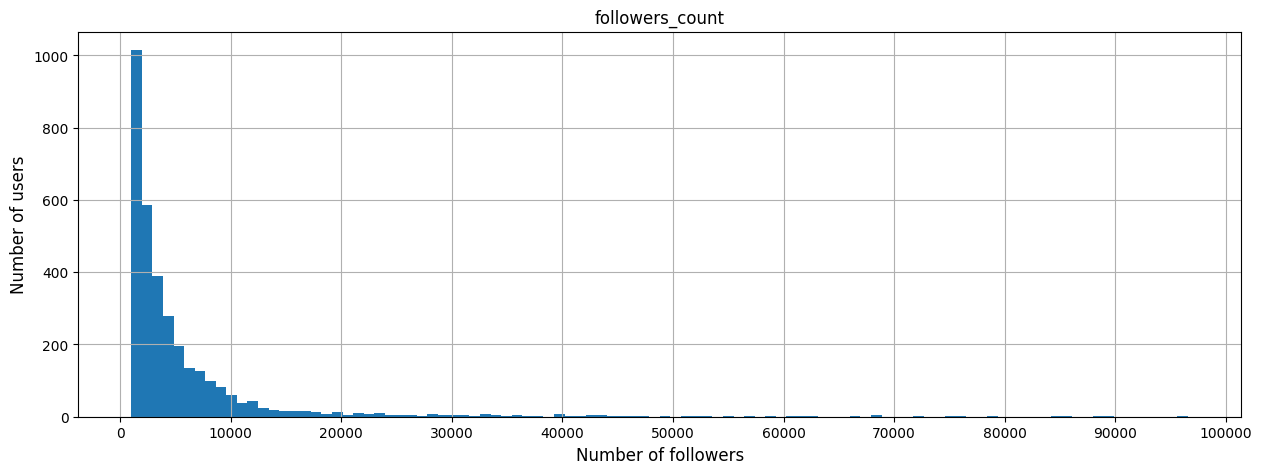

In [34]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
df[df['followers_count'] < fol_max].hist(column='followers_count', bins=100, ax=ax)
plt.xticks(np.arange(0, fol_max+1, fol_max/10))

plt.ylabel("Number of users", fontsize=12)
plt.xlabel("Number of followers",fontsize=12)

plt.show()

In [35]:
fr_max = 10000

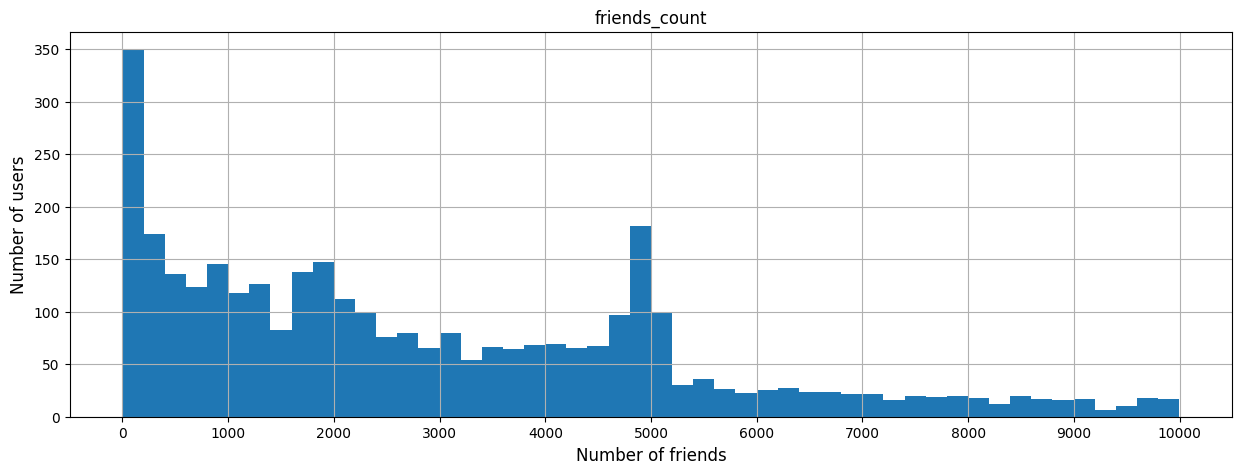

In [36]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['friends_count'] < fr_max].hist(column='friends_count', bins=50, ax=ax)
plt.xticks(np.arange(0, fr_max+1, fr_max/10))

plt.ylabel("Number of users", fontsize=12)
plt.xlabel("Number of friends",fontsize=12)

plt.show()

In [37]:
status_max = 1000000

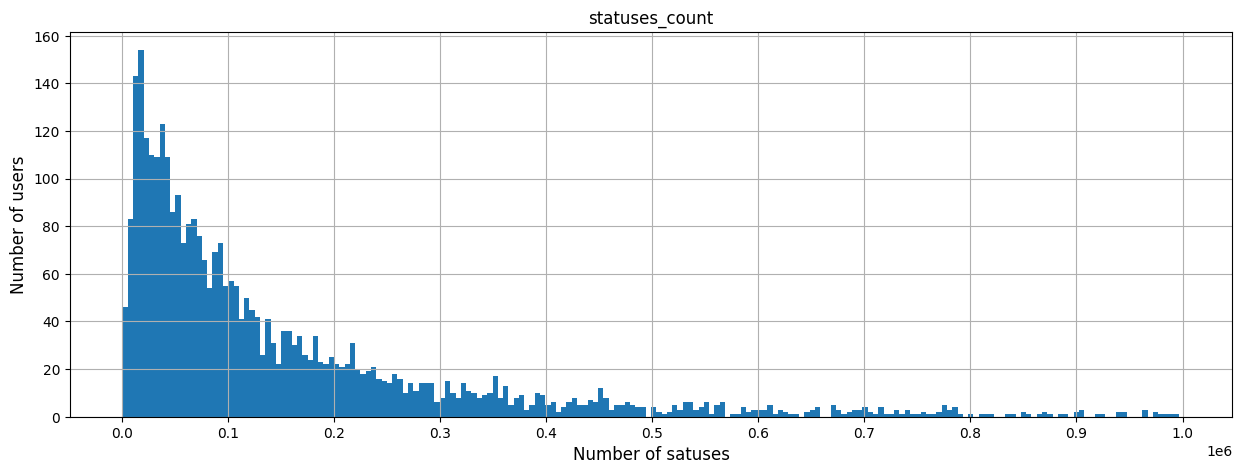

In [38]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['statuses_count'] < status_max].hist(column='statuses_count', bins=200, ax=ax)
plt.xticks(np.arange(0, status_max+1, status_max/10))

plt.xlabel("Number of satuses", fontsize=12)
plt.ylabel("Number of users",fontsize=12)

plt.show()

In [39]:
list_max = 5000

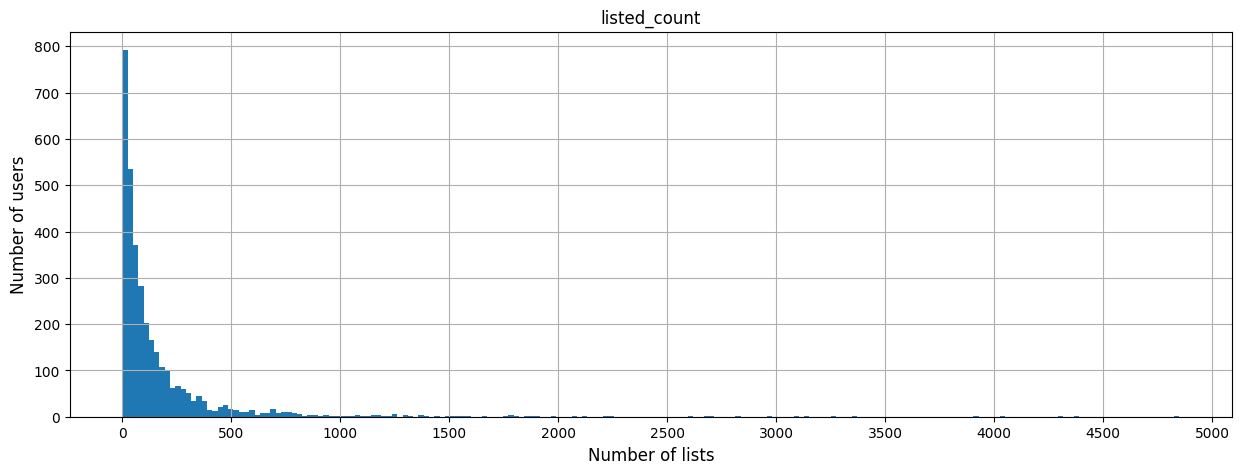

In [40]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df[df['listed_count'] < list_max].hist(column='listed_count', bins=200, ax=ax)
plt.xticks(np.arange(0, list_max+1, list_max/10))

plt.ylabel("Number of users", fontsize=12)
plt.xlabel("Number of lists",fontsize=12)

plt.show()

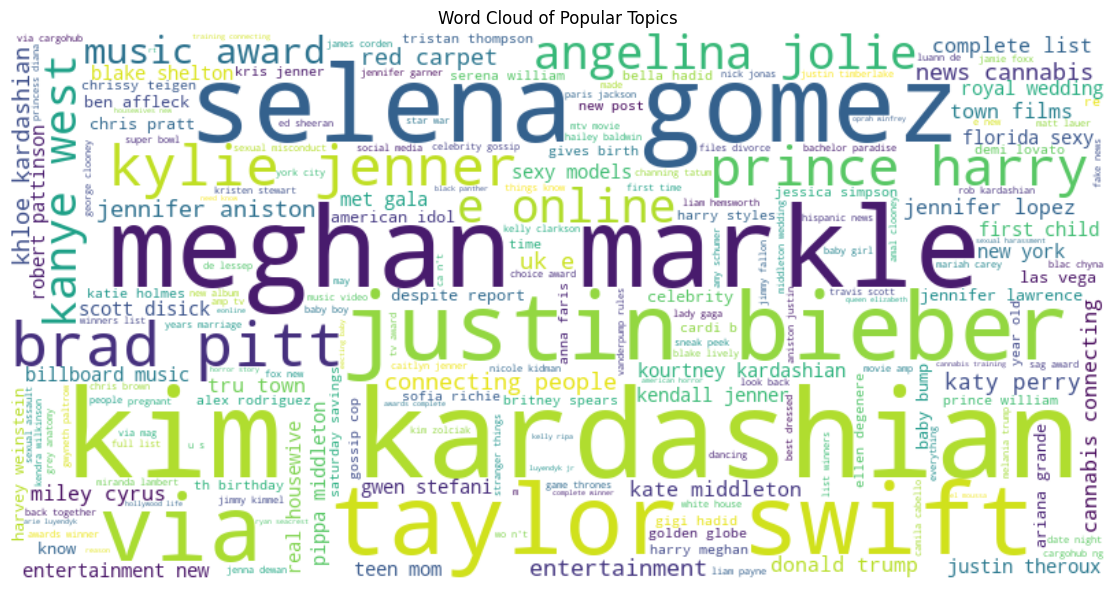

In [45]:
from wordcloud import WordCloud

# Replace NaN values with empty strings
df['tweets'] = df['tweets'].fillna('')

# Join the text from all tweets
all_text = ' '.join(df['tweets'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Popular Topics')
plt.axis('off')
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd

top_friends_accounts = df.nlargest(5, 'friends_count')[['name', 'friends_count']]

# Find the top 5 accounts with the highest number of followers
top_followers_accounts = df.nlargest(5, 'followers_count')[['name', 'followers_count']]

# Find the top 5 accounts with the highest number of both friends and followers
df['TotalFollowersFriends'] = df['friends_count'] + df['followers_count']
top_both_accounts = df.nlargest(5, 'TotalFollowersFriends')[['name', 'TotalFollowersFriends']]

print("Top 5 accounts with the highest number of friends:")
print(top_friends_accounts)

print("\nTop 5 accounts with the highest number of followers:")
print(top_followers_accounts)

# print("\nTop 5 accounts with the highest number of both friends and followers:")
# print(top_both_accounts)

Top 5 accounts with the highest number of friends:
                name  friends_count
227    Texas Insider           9997
499     Dread Pirate           9994
433   ProudNavyMom56           9988
479  Ricky Roberts ❌           9987
360    🏳️‍🌈 TLeonard           9986

Top 5 accounts with the highest number of followers:
                   name  followers_count
0         DRUDGE REPORT          1378378
1          NYT Business           786607
2         Jeffrey Levin           610302
3   History Lovers Club           547308
4  GLAMOUR South Africa           500713


In [42]:
top_followers_accounts = df.nlargest(5, 'followers_count')

print("Fake probability for top 5 accounts with highest followers:")
for index, row in top_followers_accounts.iterrows():
    print(f"{row['name']}: {row['fake_prob']}")

Fake probability for top 5 accounts with highest followers:
DRUDGE REPORT: 0.375
NYT Business: 0.3636363636363637
Jeffrey Levin: 0.3289473684210526
History Lovers Club: 0.9411764705882352
GLAMOUR South Africa: 0.5833333333333334


In this dataset, the values have % of fake probability more than 0.5 are classified fake, and those below 0.5 are classified as real.

We can see that "History Lovers Club" despite having 4th most followers have 94% fake news and also "GLAMOUR South Africa" has 58% fake news

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0 Texts:
1. breaking florida moves for full recount of state over massive voter fraud details via report^rt dear r e s i s t a n c e thanks encouragement i filed fec run democrat us congress hous^sean hannity attacks media covering disastrous interview trump lawyer rudy giuliani^republican national committee emails were hacked^trump supreme court nominee kavanaugh questioned watergate tapes decision via^nratv host dan bongino used doctored infowars video jim acosta white house press briefing^canada slaps 12.5 billion in tariffs on us goods as trump trade war disaster grows via^bette midler pretty excited hillary clinton showed watch hello dolly broadway.
2. they decide spent billion dollars aid given israel trump free healthcare college r^woops kim pulls old one two stupid us president us president busy destroying us economy building wa^doctors who discovered cancer enzymes in vaccines all found murdered^bill gates former doctor says billionaire refused to vaccinate his childr

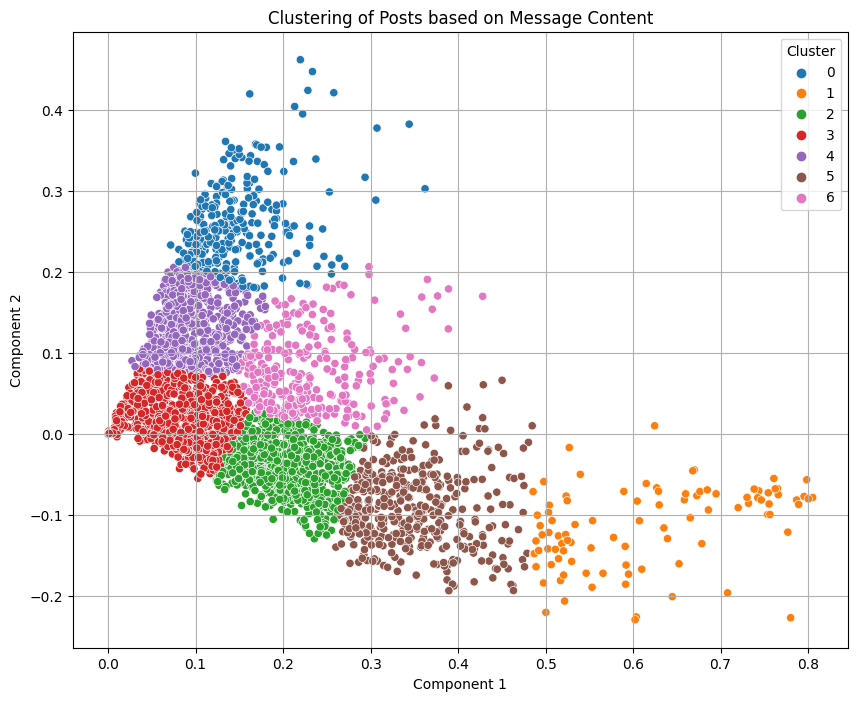

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a K-means clustering pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('svd', TruncatedSVD(n_components=2)),  # Reduce dimensionality for visualization
    ('kmeans', KMeans(n_clusters=7, random_state=42))  # 7 clusters
])

# Fit the pipeline to the text data
pipeline.fit(df['tweets'].fillna(''))

# Get cluster labels
cluster_labels = pipeline.named_steps['kmeans'].labels_
df['cluster'] = cluster_labels

# Display a sample of texts from each cluster
for cluster_id in range(7):  # Assuming 7 clusters
    print(f"\nCluster {cluster_id} Texts:")
    cluster_texts = df[df['cluster'] == cluster_id]['tweets'].sample(n=5, random_state=42)  # Displaying 5 sample texts from each cluster
    for idx, text in enumerate(cluster_texts, start=1):
        print(f"{idx}. {text}")

# Plot the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pipeline.named_steps['svd'].transform(pipeline.named_steps['tfidf'].transform(df['tweets'].fillna('')))[:, 0], 
                y=pipeline.named_steps['svd'].transform(pipeline.named_steps['tfidf'].transform(df['tweets'].fillna('')))[:, 1], 
                hue=cluster_labels, palette='tab10', legend='full')
plt.title('Clustering of Posts based on Message Content')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()